In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import seaborn as sns
import scipy
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [3]:
dataframe = pd.read_csv("/content/drive/MyDrive/ADM/steam_reviews.csv")

**<h1> ADM HOMEWORK - GROUP 28 </h1>**

**<h1>[RQ1]</h1>**
After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.


The dataset **Steam Reviews** contains the reviews received for the applications in Steam. Each row in the dataset represents a review made by one user or author about a specific application. 

In [4]:
dataframe.shape

(21747371, 23)

The dataset contains *21747371 observations* and *23 features*. The large size of the dataset doesn't allow the complete visualization, but in order to have an idea about how the data are it's possible to observe the first 5 and the last 5 rows, which constitute respectively the *head* and the *tail* of the dataset. 

In [ ]:
dataframe.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.00,0,True,False,False,76561199095369542,6,2,1909.00,1448.00,1909.00,1611343383.00
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.00,0,True,False,False,76561198949504115,30,10,2764.00,2743.00,2674.00,1611386307.00
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.00,0,True,False,False,76561199090098988,5,1,1061.00,1061.00,1060.00,1611383777.00
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.00,0,True,False,False,76561199054755373,5,3,5587.00,3200.00,5524.00,1611383744.00
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.00,0,True,False,False,76561199028326951,7,4,217.00,42.00,217.00,1610788249.00


In [ ]:
dataframe.tail()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,0.00,0,True,False,False,76561197967033932,431,7,432.00,0.00,29.00,1586627816.00
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,0.00,0,False,False,False,76561198046495482,70,10,3296.00,15.00,24.00,1611080231.00
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,0.47,0,True,False,False,76561198176379749,79,17,2654.00,0.00,34.00,1591633753.00
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,0,0.39,11,True,False,False,76561198041763187,140,3,210.00,0.00,12.00,1589715415.00
21747370,21747375,546560,Half-Life: Alyx,65644930,schinese,WMR加载中闪退，无法进入游戏\nWMR Flashback in Load，cant pl...,1584986505,1592060800,True,0,0,0.42,5,True,False,False,76561198116747069,253,7,1062.00,0.00,8.00,1602857543.00


Actually only 22 of 23 features will provide information about the reviews, the authors of these reviews and the apps because the feature "Unnamed:0" indicates only the index of a review inside the dataset. In particular: 

*   **app_id** contains the app id to which the review refers.
*   **app_name** contains the name of the app to which the review refers.
*   **review_id** contains the review id.
*   **language** contains the language in which the review was written.
*   **review** contains the text of the review.
*   **timestamp_created** the date of creation of the review.
*   **timestamp_updated** the date of last modification of the review.
*   **recommended** indicates if the author recommends the app. 
*   **votes_helpful** indicates how how many authors find the review helpful.
*   **votes_funny** indicates how how many authors find the review funny.
*   **weighted_vote_score** contains the utility score.
*   **comment_count** contains the number of comments for each review.
*   **steam_purchase** indicates if the user purchased the game on steam.
*   **received_for_free** indicates if the app is free for the user.
*   **written_during_early_access** indicates if the author posted the review while the game was in early access.
*   **author.steamid** contains the id of the author.
*   **author.num_games_owned** indicates the number of games owned by the user.
*   **author.num_reviews** indicates the number of reviews written by an author.
*   **author.playtime_forever** indicates the total recorded game time for this application. 
*   **author.playtime_last_two_weeks** indicates the game time recorded in the last two weeks for this application. 
*   **author.playtime_at_review** indicates the game time in which the review was written.
*   **author.last_played** indicates the last time the user started the application. 





In [35]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

The dataset contains *boolean*, *object*, *integer* and *floating* variables. In order to analyze the main characteristics of the variables have been subdivided by type.

The variables **"recommended"**, **"steam_purchase"**, **"received_for_free"** and **"written_during_early_access"** are boolean variables. In particular: 
* **recommended** is equal to **True** if the author recommends the app.
* **steam_purchase** is equal to **True** if the app is purchased on steam.
* **received_for_free** is equal to **True** if the app is free for the user.
* **written_during_early_access** is equal to **True** if the review was posted while the game was in early access.

In [36]:
dataframe.describe(include = "bool")

,recommended,steam_purchase,received_for_free,written_during_early_access
count,21747371,21747371,21747371,21747371
unique,2,2,2,2
top,True,True,False,False
freq,19022610,16842432,21059310,19730986


For **"recommended"** and **"steam_purchase"** features there is a prevalence of True values, on the contrary for **"received_for_free"** and **"written_during_early_access"** variables there is a prevalence of False values.

The variables **"language"** and **"app_name"** has object type.

In [9]:
dataframe[["language", "app_name"]].describe()

,language,app_name
count,21747371,21747371
unique,28,315
top,english,PLAYERUNKNOWN'S BATTLEGROUNDS
freq,9635437,1644255


The variable **"language"** has 28 unique values and **"app_name"** has 315 unique values. This means that the dataset contains 21747371 reviews about 315 apps written in 28 languages. The language most used is English and the app for which it's possible to count more reviews is "PLAYERUNKNOWN'S BATTLEGROUNDS".

The features **"weighted_vote_score"**, **"author.playtime_forever"**. **"author.playtime_last_two_weeks"**, **"author.playtime_at_review"**, **"author.last_played"** are floating variables and they have the following main characteristics:

In [15]:
dataframe.describe(include = "float64")

,weighted_vote_score,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,21747371.00000,21747369.00000,21747369.00000,21721689.00000,21747369.00000
mean,0.16544,16091.04969,155.54214,8807.42142,1580505062.05797
std,0.24340,37430.56776,730.04880,23885.53054,46761775.23009
min,0.00000,0.00000,0.00000,1.00000,0.00000
25%,0.00000,1250.00000,0.00000,559.00000,1573329476.00000
50%,0.00000,4307.00000,0.00000,1881.00000,1599058030.00000
75%,0.48276,14912.00000,0.00000,6823.00000,1609002209.00000
max,0.99599,3744943.00000,27039.00000,3228103.00000,1611434142.00000


The variables **"Unnamed: 0"**, **"app_id"**, **"review_id"**, **"author.steamid"**, **"votes_helpful"**, **"votes_funny"**, **"comment_count"**, **"author.num_games_owned"**, **"author.num_reviews"**, **"timestamp_created"** and **"timestamp_updated"** are indicated as integer variables. But, **"timestamp_created"** and **"timestamp_updated"** are dates in unix format and **"app_id"**, **"review_id"**, **"author.steamid"** are ID, so we are not interested in their main descriptive statistics. 

In [16]:
deletelistint = ["Unnamed: 0", "app_id", "review_id","author.steamid", "timestamp_created","timestamp_updated"]
dataframe.drop(deletelistint, axis = 1).describe(include = "int64")


,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews
count,21747371.00000,21747371.00000,21747371.00000,21747371.00000,21747371.00000
mean,404468.85528,126791.72558,0.13088,1011300.09672,404477.48002
std,1333740760.95209,23335525.90491,2.19940,2108829161.08044,1333740760.91813
min,0.00000,0.00000,0.00000,0.00000,1.00000
25%,0.00000,0.00000,0.00000,22.00000,2.00000
50%,0.00000,0.00000,0.00000,61.00000,4.00000
75%,1.00000,0.00000,0.00000,145.00000,10.00000
max,4398046511106.00000,4294967295.00000,4893.00000,4398046511619.00000,4398046511108.00000


As indicate above, the variable **"Unnamed: 0"** doesn't add information and for this reason we don't analyze it. About **"review_id"**, **"author.steamid"** and **"app_id"** it's important to put the attention on unique values. 

In [37]:
dataframe["app_id"].unique().shape

(315,)

The number of **"app_id"** is equal to the number of **"app_name"**, this means that there aren't app with the same name.

In [38]:
dataframe["author.steamid"].unique().shape

(12406560,)

The dataset contains 21747371 rewiews written by 12406560 authors about 315 apps.

Observing the count of the described variables it's possible to see that not all the values are equal. Ideally all the count should be equal to the number of rows in the dataset, but it’s not always like that. This means that there are any null values within the dataset. 

In [39]:
missingvalues = dataframe.isna().sum()
print("Number of missing values for each variable: \n", missingvalues)

Number of missing values for each variable: 
 Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64


In [40]:
percmissingvalues = (dataframe.isna().sum()*100 /dataframe.shape[0])
print("Percentage of missing values for each variable: \n", percmissingvalues)

Percentage of missing values for each variable: 
 Unnamed: 0                       0.00000
app_id                           0.00000
app_name                         0.00000
review_id                        0.00000
language                         0.00000
review                           0.15515
timestamp_created                0.00000
timestamp_updated                0.00000
recommended                      0.00000
votes_helpful                    0.00000
votes_funny                      0.00000
weighted_vote_score              0.00000
comment_count                    0.00000
steam_purchase                   0.00000
received_for_free                0.00000
written_during_early_access      0.00000
author.steamid                   0.00000
author.num_games_owned           0.00000
author.num_reviews               0.00000
author.playtime_forever          0.00001
author.playtime_last_two_weeks   0.00001
author.playtime_at_review        0.11809
author.last_played               0.00001
dtype: 

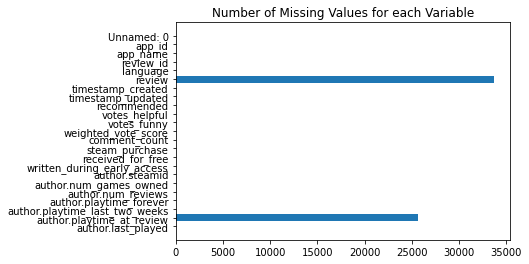

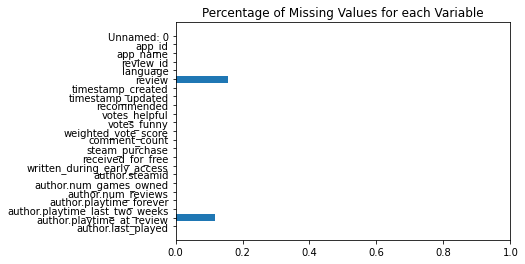

In [41]:
plt.barh(dataframe.columns.values, missingvalues.values)
plt.title('Number of Missing Values for each Variable')
plt.gca().invert_yaxis()
plt.show()

plt.barh(dataframe.columns.values,percmissingvalues.values)
plt.title('Percentage of Missing Values for each Variable')
plt.gca().invert_yaxis()
plt.xlim(0,1)
plt.show()

It's possible to see that the variables: **"review"**, **"author.playtime_forever"**, **"author.playtime_at_review"** and **"author.last_played"** contains null values. 


**<h1>[RQ2]</h1>** Let's explore the dataset by finding simple insights into the reviews.

**[RQ2] a.** Plot the number of reviews for each application in descending order.


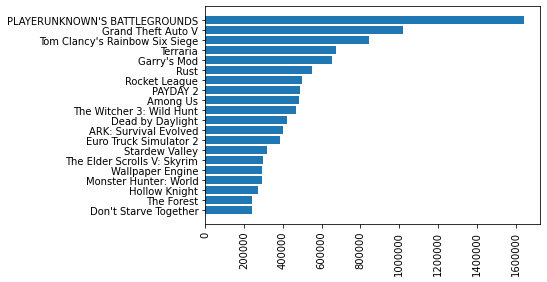

In [42]:
plt.barh(dataframe["app_name"].value_counts().index[0:20], dataframe["app_name"].value_counts().values[0:20])
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.figsize = (12, 5)
plt.show()

In the plot are represented only the first 20 most reviewed applications because there are 315 applications and if we represent all the plot become unreadable. 

**[RQ2] b.** What applications have the best Weighted Vote Score?

Applications having best Weighted Vote Score: 
                           app_name  weighted_vote_score
5571634             Stardew Valley              0.99599
10626081  Divinity: Original Sin 2              0.99525
2353895                 Subnautica              0.99445
9375898                     Mirror              0.99404
4599864           Wallpaper Engine              0.99354
18596700                  Terraria              0.99289
2825980                 The Forest              0.99258
15575403     Monster Hunter: World              0.99250
15732624  The Elder Scrolls Online              0.99236
2564824           Human: Fall Flat              0.99234
17496921           DARK SOULS™ III              0.99233
16810697              No Man's Sky              0.99227
9625708                  Undertale              0.99216
4621204           Wallpaper Engine              0.99180
9325921                     Mirror              0.99177
4878941                     Kenshi              0.99150


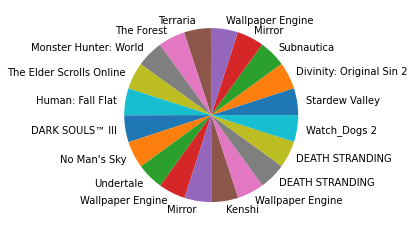

In [43]:
#TOP 20 MOST WEIGHTED VOTE SCORES
#Sorting the weighted_vote_score by descending order and return 20 top applications
sorted_df_by_vote = dataframe.sort_values("weighted_vote_score", ascending=False)[["app_name","weighted_vote_score"]][:20] #values
print("Applications having best Weighted Vote Score: \n", sorted_df_by_vote)

app_names = sorted_df_by_vote.values[:,0] #List of applications 
weighted_scores = sorted_df_by_vote.values[:,1] #List of weighed_score
plt.pie(weighted_scores,labels=app_names) #Making pie chart, labels are application names and values are weighted_vote_score
plt.show() 

In particular the application that have the Best Weighted Vote Score is : **Stardew Valley** with a weighted score equal to **0.99599**.

**[RQ3] c.** Which applications have the most and the least recommendations?

In [44]:
recomreviews = dataframe[dataframe["recommended"]== True].groupby(['app_name']).recommended.sum().sort_values(ascending = False)
print("The 10 applications most recommended are:\n", recomreviews.head(10))
print("The 10 applications least recommended are:\n", recomreviews.tail(10))

The 10 applications most recommended are:
 app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Rust                              468892
Among Us                          463287
The Witcher 3: Wild Hunt          460252
Rocket League                     449464
PAYDAY 2                          428136
Name: recommended, dtype: int64
The 10 applications least recommended are:
 app_name
Down To One                    797
Urban Empire                   759
Umbrella Corps                 707
Hunt Down The Freeman          689
Rapture Rejects                672
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  89
Name: recommended, dtype: int64


The application **PLAYERUNKNOWN'S BATTLEGROUNDS** is the most reviewed app and is also the most recommended, in fact is recommended in 886417 reviews. The application least recommended is **Neon Hardcorps** because is recommended only in 89 reviews. 

**[RQ3] d.** How many of these applications were purchased, and how many were given for free?

In [45]:
freeapps = dataframe[dataframe["received_for_free"] == True].shape[0]
purchasedapps = dataframe.shape[0] - freeapps
print(freeapps, "apps are given for free.")
print(purchasedapps, "apps are purchased.")

688061 apps are given for free.
21059310 apps are purchased.


**<h1>[RQ3]</h1>** Now it's important to understand the preferred time to do reviews.

**[RQ3] a.** What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [41]:
time_data = dataframe[["timestamp_created", "timestamp_updated", "review_id"]]

In [40]:
timestamp_creatednew = pd.to_datetime(time_data["timestamp_created"], unit='s')
timestampfreq = timestamp_creatednew.dt.time.value_counts().head(10)
timestampfreq

15:54:53    583
17:56:41    393
15:24:50    390
17:53:12    389
14:42:19    387
14:45:11    384
15:04:07    382
18:24:34    381
18:20:45    379
15:28:36    379
Name: timestamp_created, dtype: int64

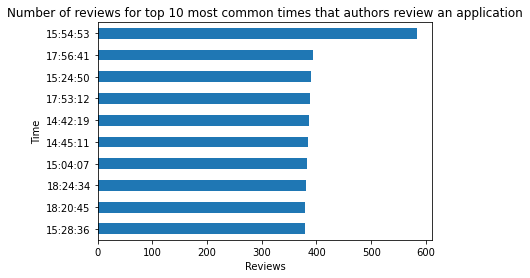

In [48]:
timestampfreq.sort_values().plot.barh()
plt.title("Number of reviews for top 10 most common times that authors review an application")
plt.xlabel("Reviews")
plt.ylabel("Time")
plt.show()

The most common time that authors review an application is **15:54:53**, in particular **583** reviews contained within the dataset have been created at **15:54:53**. 

**[RQ3] b.** Create a function that receives as a parameter a list of time intervals and
returns the plot the number of reviews for each of the intervals.

In [73]:
def plotintervals(time_stamps):
    out = list()
    plot = list()
    for i in range(0,len(time_stamps),2):
        start = time_stamps[i]
        end = time_stamps[i+1]
        plot.append(time_data.between_time(start,end).count())
    [out.append(i['review_id']) for i in plot]
    intervals = ['6-10:59','11-13:59','14:00-16:59','17-19:59','20-23:59','00-02:59','03-05:59']
    plt.bar(intervals, out)
    plt.xticks(rotation=90)
    plt.show()
    return

**[RQ3] c.** Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

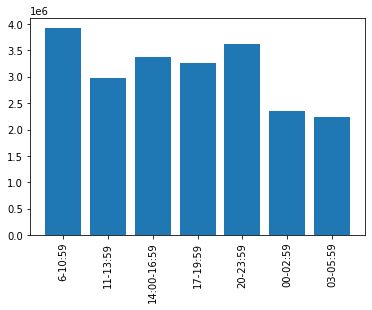

In [74]:
time_data['Time'] = pd.to_datetime(time_data['timestamp_created'], unit = "s")
time_data = time_data.set_index('Time')
timestamps = ['06:00:00','10:59:59',
              '11:00:00', '13:59:59',
              '14:00:00', '16:59:59',
              '17:00:00', '19:59:59',
              '20:00:00', '23:59:59',
              '00:00:00', '02:59:59',
              '03:00:00', '05:59:59']

myplot = plotintervals(timestamps)

**<h1>[RQ4]</h1>** 
As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

**[RQ4] a.** What are the top 3 languages used to review applications?

In [51]:
topthreelanguages = dataframe["language"].value_counts()[0:3]
topthreelanguages

english     9635437
schinese    3764967
russian     2348900
Name: language, dtype: int64

The top 3 languages used to review applications are: **english**, **schinese**, **russian**.

**[RQ4] b.** Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [5]:
def filterlanguages (dataset, languages):
    finaldataset = pd.DataFrame() #empty data set 
    datasetlanguages = list(dataset["language"].unique()) #create the list of unique languages 
    for i in range (len(languages)):
      if (languages[i] in datasetlanguages): #check if the languages in the input list are present within language variable
        mydataset = dataset[dataset['language'] == languages[i]] #filter the dataset
        finaldataset = pd.concat([finaldataset, mydataset]) #concatenate the datasets
      else:
        print("there aren't reviews written in", languages[i], "language")
    finaldataset = finaldataset.sort_values("Unnamed: 0") 
    return finaldataset

**[RQ4] c.** Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [52]:
english = ["english"]
schinese = ["schinese"]
russian = ["russian"]
funnyreviews = dataframe[dataframe["votes_funny"] > 0]
topthreelang_reviews = filterlanguages(dataframe, topthreelanguages.index.tolist())

In [53]:
perc_englishrevewsfunny = filterlanguages(funnyreviews, english).shape[0]/topthreelang_reviews.shape[0]*100
print("reviews written in english:", perc_englishrevewsfunny)
perc_schineserevewsfunny = filterlanguages(funnyreviews, schinese).shape[0]/topthreelang_reviews.shape[0]*100
print("reviews written in schinese:", perc_schineserevewsfunny)
perc_russianrevewsfunny = filterlanguages(funnyreviews, russian).shape[0]/topthreelang_reviews.shape[0]*100
print("reviews written in english:", perc_russianrevewsfunny)

reviews written in english: 6.895523764097766
reviews written in schinese: 2.825172464764157
reviews written in english: 2.487627389756398


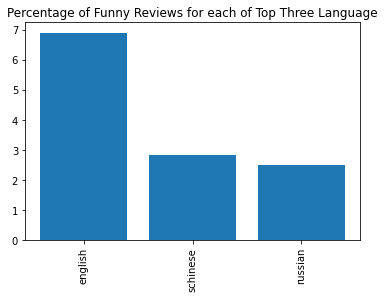

In [54]:
percentagefunny = [perc_englishrevewsfunny, perc_schineserevewsfunny, perc_russianrevewsfunny]
plt.bar(topthreelanguages.index, percentagefunny)
plt.title('Percentage of Funny Reviews for each of Top Three Language')
plt.xticks(rotation=90)
plt.show()

Considering the reviews written in **english**, **schinese** and **russian**:
* the percentage of reviews written in english and votes as funny is equal to **6.895523764097766**.
* the percentage of reviews written in schinese and votes as funny is equal to **2.825172464764157**.
* the percentage of reviews written in russian and votes as funny is equal to **2.487627389756398**.


In [55]:
print("reviews written in english, schinese and russian:", filterlanguages(funnyreviews,topthreelanguages.index.tolist()).shape[0]/topthreelang_reviews.shape[0]*100)

reviews written in english, schinese and russian: 12.208323618618321


The percentage of reviews written in english, schinese and russian and votes as funny is equal to **12.208323618618321**.

**[RQ4] d.** Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [56]:
helpfulreviews = dataframe[dataframe["votes_helpful"] > 0]

In [57]:
perc_englishrevewshelp = filterlanguages(helpfulreviews, english).shape[0]/topthreelang_reviews.shape[0]*100
print("reviews written in english:", perc_englishrevewshelp)
perc_schineserevewshelp = filterlanguages(helpfulreviews, schinese).shape[0]/topthreelang_reviews.shape[0]*100
print("reviews written in schinese:", perc_schineserevewshelp)
perc_russianrevewshelp = filterlanguages(helpfulreviews, russian).shape[0]/topthreelang_reviews.shape[0]*100
print("reviews written in english:", perc_russianrevewshelp)

reviews written in english: 17.866649853225262
reviews written in schinese: 6.0012620240234105
reviews written in english: 5.294811758030704


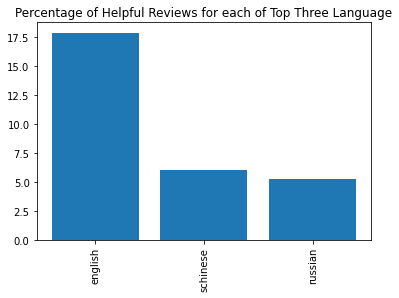

In [58]:
percentagehelp = [perc_englishrevewshelp, perc_schineserevewshelp, perc_russianrevewshelp]
plt.bar(topthreelanguages.index, percentagehelp)
plt.title('Percentage of Helpful Reviews for each of Top Three Language')
plt.xticks(rotation=90)
plt.show()

Considering the reviews written in **english**, **schinese** and **russian**:
* the percentage of reviews written in english and votes as helpful is equal to **17.866649853225262**.
* the percentage of reviews written in schinese and votes as helpful is equal to **6.0012620240234105**.
* the percentage of reviews written in russian and votes as helpful is equal to **5.294811758030704**.

In [55]:
print("reviews written in english, schinese and russian:",filterlanguages(helpfulreviews,topthreelanguages.index).shape[0]/topthreelang_reviews.shape[0]*100)

reviews written in english, schinese and russian: 29.162723635279374


The percentage of reviews written in english, schinese and russian and votes as helpful is equal to **29.162723635279374**.

**<h1>[RQ5]</h1>**  The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

**[RQ5] a.** Plot the top 10 most popular reviewers and the number of reviews.

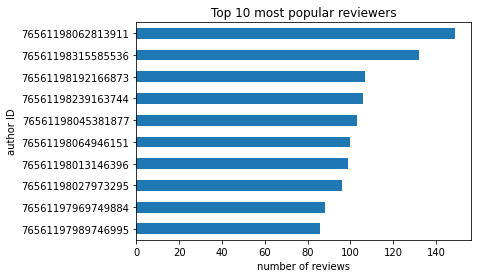

In [59]:
dataframe['author.steamid'] = dataframe['author.steamid'].astype(object)
popularreviewers = dataframe.groupby(['author.steamid']).size().sort_values()
popularreviewers.tail(10).plot.barh()
plt.title("Top 10 most popular reviewers")
plt.ylabel ("author ID")
plt.xlabel ("number of reviews")
plt.show()

**[RQ5] b.** What applications did the most popular author review?

In [60]:
mostpopular = popularreviewers.tail(1).index[0]
applications = list(dataframe[dataframe["author.steamid"] == mostpopular].app_name.unique())
print("The most popular author reviews", len(applications), "applications:")
for i in range (len(applications)):
  print(applications[i])

The most popular author reviews 148 applications:
Half-Life
Counter-Strike: Source
Half-Life 2: Episode Two
Portal 2
Garry's Mod
Sid Meier's Civilization V
Dead by Daylight
Sid Meier's Civilization VI
Subnautica
Human: Fall Flat
Banished
Celeste
Getting Over It with Bennett Foddy
A Hat in Time
The Forest
Axiom Verge
The Binding of Isaac: Rebirth
To the Moon
Cave Story+
Titan Souls
Super Meat Boy
Don't Escape: 4 Days to Survive
Volgarr the Viking
Enter the Gungeon
Salt and Sanctuary
Hollow Knight
The End Is Nigh
Factorio
RimWorld
Insurgency: Sandstorm
Euro Truck Simulator 2
Foundation
Kenshi
Into the Breach
Warhammer: Vermintide 2
DOOM Eternal
Age of Empires: Definitive Edition
Void Bastards
Stardew Valley
Among Us
Blackwake
Little Nightmares
Bomber Crew
Rust
HITMAN™ 2
Phasmophobia
Mount & Blade: Warband
Resident Evil 2
Slime Rancher
Hotline Miami
Tomb Raider
BattleBlock Theater
Dishonored
South Park™: The Stick of Truth™
Undertale
Don't Starve
Rocket League
Dead Cells
Broforce
The Wolf

**[RQ5] c.** How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [61]:
reviewmostpopauthor = dataframe[dataframe["author.steamid"] == mostpopular]

In [62]:
reviewmostpopauthor = reviewmostpopauthor.drop_duplicates(subset ="app_name", keep = "first")
freeapps = reviewmostpopauthor[reviewmostpopauthor['received_for_free'] == True].shape[0]
freeappsperc = freeapps/len(applications)*100
purchasedapps = len(applications) - freeapps
purchasedappsperc = purchasedapps/len(applications)*100
print("Number of free applications:", freeapps)
print("Percentage of free applications:", freeappsperc)
print("Number of purchased applications:", purchasedapps)
print("Percentage of purchased applications:", purchasedappsperc)

Number of free applications: 4
Percentage of free applications: 2.7027027027027026
Number of purchased applications: 144
Percentage of purchased applications: 97.2972972972973


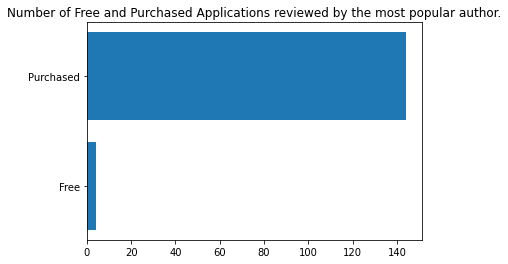

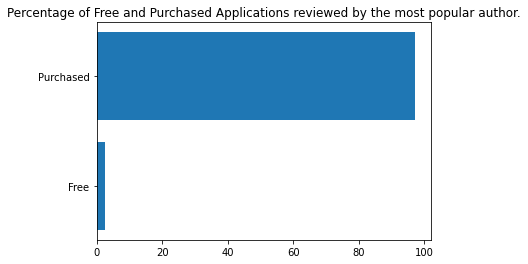

In [63]:
levels = ["Free","Purchased"]
numberapplications = [freeapps, purchasedapps]
plt.barh(levels, numberapplications)
plt.title("Number of Free and Purchased Applications reviewed by the most popular author.")
plt.show()

percapplications = [freeappsperc, purchasedappsperc]
plt.barh(levels, percapplications)
plt.title("Percentage of Free and Purchased Applications reviewed by the most popular author.")
plt.show()

**[RQ5] d.** How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [64]:
freeapplications = reviewmostpopauthor[reviewmostpopauthor['received_for_free'] == True]
free_pos = freeapplications[freeapplications["recommended"] == True].shape[0]
free_neg = freeapplications.shape[0]-free_pos
purchasedapplications = reviewmostpopauthor[reviewmostpopauthor['received_for_free'] != True]
purch_pos = purchasedapplications[purchasedapplications["recommended"] == True].shape[0]
purch_neg = purchasedapplications.shape[0] - purch_pos 

print("Number of free applications reviewed positively:", free_pos)
print("Number of free applications reviewed negatively:", free_neg)
print("Number of purchased applications reviewed positively:", purch_pos)
print("Number of purchased applications reviewed negatively:", purch_neg)

Number of free applications reviewed positively: 4
Number of free applications reviewed negatively: 0
Number of purchased applications reviewed positively: 141
Number of purchased applications reviewed negatively: 3


**<h1>[RQ6]</h1>** It's time to get information from the updates that a user does to his reviews.

**[RQ6] a.** What is the average time (days and minutes) a user lets pass before he updates a review?

In [65]:
#FIRST, WE CALCULATE TIME DELTA BETWEEN TWO TIMESTAMPS
import datetime as dt
from datetime import timedelta
dataframe2 = [dataframe["timestamp_updated"], dataframe["timestamp_created"]]
dataframe["time_diff"] = dataframe["timestamp_updated"] - dataframe["timestamp_created"] #Time delta
time_avg = dataframe["time_diff"].mean()  #Average time of updating, but it's in seconds
delta = dt.timedelta(seconds = time_avg) 
print("The average time a user lets pass before he updates a rewiew is: {} days and {} minutes ".format(delta.days, (delta.seconds//60)))

The average time a user lets pass before he updates a rewiew is: 36 days and 213 minutes 


**[RQ6] b.** Plot the top 3 authors that usually update their reviews.

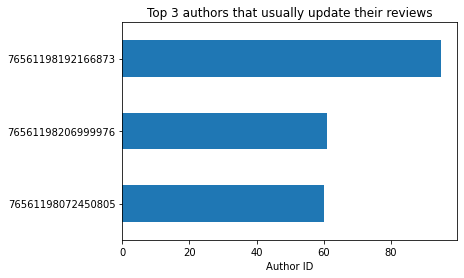

In [66]:
#MASKING THE DATAFRAME FOR TIMESTAMP_CREATED IS NOT EQUAL TO TIMESTAMP_UPDATED
mask_different_timestamp = dataframe.loc[dataframe["timestamp_created"] != dataframe["timestamp_updated"]]
mask_different_timestamp.head()

#Masking dataframe by timestamp_created is not equal to timestamp_updated
#And then retreiving only author.steamid
mask_different_timestamp["author.steamid"].value_counts()[:3].sort_values().plot.barh()
plt.title("Top 3 authors that usually update their reviews")
plt.xlabel("Author ID")
plt.show()


**<h1>[RQ7]</h1>** Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

**[RQ7] a.** What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?


The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is given by the ratio between the number of review that have Weighted Vote Score equal to or bigger than 0.5 and the number of the reviews in the dataset. 

In [67]:
mask_weighted_vote_more_than5 = dataframe.loc[dataframe["weighted_vote_score"] >= 0.5] #Masking dataframe to have only weighted_vote_score >=0.5
prob_weighted_vote_score_more_than5 = (len(mask_weighted_vote_more_than5)/ len(dataframe)) #Getting the probability by dividing masked dataframe by total length
print("The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is {}".format(prob_weighted_vote_score_more_than5))

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 0.21998484322541792


**[RQ7] b.** What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

The conditional probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is given by: the ratio between the number of reviews that has at least one vote as funny and  weighted vore score bigger than 0.5 and the number of reviews that have weighted vote score bigger than 0.5. 

In [68]:
#A = {a reviews has at least one vote as funny}
#B = {the weighted vote score is bigger than 0.5}
A = dataframe[dataframe["votes_funny"] >= 1]
B = dataframe[dataframe["weighted_vote_score"] > 0.5]
#individual probability of A and B.
probA = A.shape[0]/dataframe.shape[0]
probB = B.shape[0]/dataframe.shape[0]
#intersection of A and B
intersect = dataframe[(dataframe["votes_funny"] >= 1) & (dataframe["weighted_vote_score"] > 0.5)]
prob_intersect = intersect.shape[0]/dataframe.shape[0]
#conditional probability of A and B
cond_prob = prob_intersect/probB
print("The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is", cond_prob)


The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 0.24978288914523247


**[RQ7] c.** Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

Considering that two events A and B are indipendent if the probability of A intersected B is equal to the product between the probability of A and the probability of B: 

In [69]:
probAxB = probA * probB
print("The probability of the intersection between A and B is:", prob_intersect)
print("The product between the probability of A and the probability of B is:", probAxB)
if (probAxB == prob_intersect):
  print("A and B are indipendent")
else:
  print("A and B are not dipendent")

The probability of the intersection between A and B is: 0.05333872310358802
The product between the probability of A and the probability of B is: 0.025559911597138187
A and B are not dipendent


**<h1>[RQ8]</h1>** Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.


**[RQ8] a.** Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In order to understand what is the most appropriate statistical test or techinique to apply it is important to understand how is distributed the variable. In particular, in order to understand if the variable has a **normal** distribution, it's possibile to use the **qqplot** and to do the **Jarque - Bera Test**. 

In [70]:
from scipy import stats
s, p = stats.jarque_bera(dataframe["weighted_vote_score"])
alpha = 0.05
if p > alpha:
  print("The null hypothesis is not rejected, the variabile is distributed as a Normal.")
else:
  print("The null hypothesis is rejected, the variable is not distributed as a Normal.")
#p-value < 0.5, we reject the null hypothesis that say the variable is distributed as a normal.

The null hypothesis is rejected, the variable is not distributed as a Normal.


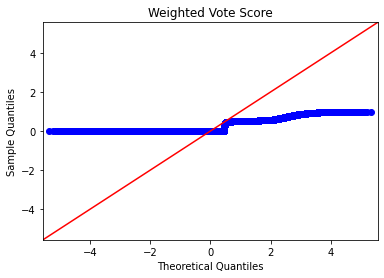

In [71]:
import statsmodels.api as sm
sm.qqplot(dataframe["weighted_vote_score"], line='45')
plt.title("Weighted Vote Score")
plt.show()

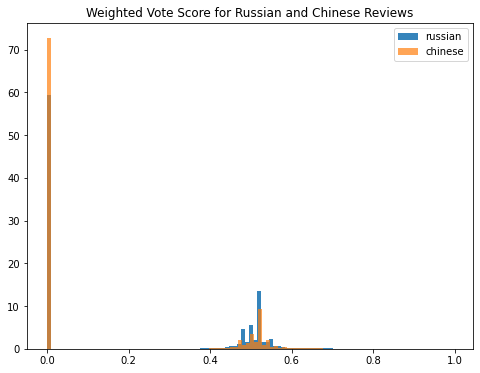

In [72]:
plt.figure(figsize=(8,6))
plt.hist(russianreviews, bins=100, alpha=0.9, label="russian", density = True)
plt.hist(chinesereviews, bins=100, alpha=0.7, label="chinese", density = True)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title("Weighted Vote Score for Russian and Chinese Reviews")
plt.legend(loc='upper right')
plt.show()

In [73]:
import statistics
print("Variance of Weighted Vote Score for Russian Reviews:", statistics.pvariance(russianreviews))
print("Variance of Weighted Vote Score for Chinese Reviews:", statistics.pvariance(chinesereviews))

Variance of Weighted Vote Score for Russian Reviews: 0.06643560228551207
Variance of Weighted Vote Score for Chinese Reviews: 0.05745690983946287


As it's possible to see in the previous plots (histograms and qqplots), and interpreting the result of the Jarque-Brera the variable **"weighted_vote_score"** is not distribute as a Normal Variable, so it isn't possible to use the t-test. We don't know how is distribute the variable and because of this it's possible use the **Mann-Whitney U test**, that is a non-parametric test. This test is preferable also to **Kolmogorov-Smirnov test** because we are considering very large samples. Under the **null hypothesis** there aren't difference between the weighted vote score for reviews written in Russian and reviews written in Chinese. Instead, under the **alternative hypothesis** there are differences between the weighted vote score for reviews written in Russian and reviews written in Chinese.

In [6]:
russian = ["russian"]
chinese = ["tchinese", "schinese"]
russianreviews = list(filterlanguages(dataframe, russian)["weighted_vote_score"])
chinesereviews = list(filterlanguages(dataframe, chinese)["weighted_vote_score"])

In [8]:
from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(chinesereviews, russianreviews)
alpha = 0.05
if p > alpha:
  print("The null hypothesis is not reject, there aren't significative differences.")
else:
  print("The null hypothesis is rejected, there are significative differences.")

The null hypothesis is rejected, there are significative differences.


**[RQ8] b.** Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

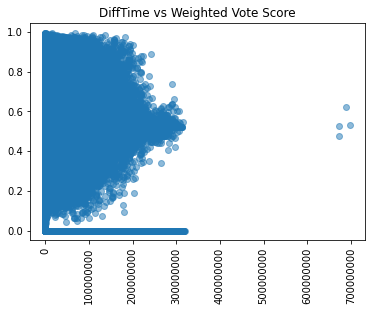

In [9]:
dataframe2 =  dataframe.filter(['timestamp_created', 'timestamp_updated', 'weighted_vote_score', "recommended"])
dataframe2["DiffTime"] = dataframe2.timestamp_updated - dataframe2.timestamp_created
plt.scatter(dataframe2["DiffTime"], dataframe2["weighted_vote_score"], alpha=0.5)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.xticks(rotation=90)
plt.title("DiffTime vs Weighted Vote Score")
plt.show()

In order to understand if there is a linear relationship between the variables it's possible to use the **Pearson's Correlation Coefficient**. 

In [10]:
#Pearson's Correlation Coefficient
from scipy.stats import pearsonr
pearsonr(dataframe2["DiffTime"], dataframe2["weighted_vote_score"])

(0.07204700562312769, 0.0)

The Pearson's Correlation Coefficient is equal to **0.07204700562312769**, so it's possible to say that there isn't a linear relationship between the two variables.

In order to understand if there is a general relationship between the variables it's possible to use the **Spearman's Correlation Coefficient**. 

In [11]:
#Spearman's Correlation Coefficient
#for not linear correlation
from scipy.stats import spearmanr
spearmanr(dataframe2["DiffTime"], dataframe2["weighted_vote_score"])

SpearmanrResult(correlation=0.1442501958037846, pvalue=0.0)

The Spearman's Correlation Coefficient is equal to **0.1442501958037846**, so it's possible to say that there isn't  relationship between the two variables.

**[RQ8] c.** Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [19]:
dataframetrue = dataframe2[dataframe2["recommended"] == True]
spearmanr(dataframetrue["DiffTime"], dataframetrue["weighted_vote_score"])

SpearmanrResult(correlation=0.1458869156651231, pvalue=0.0)

In [20]:
dataframefalse = dataframe2[dataframe2["recommended"] == False]
spearmanr(dataframefalse["DiffTime"], dataframefalse["weighted_vote_score"])

SpearmanrResult(correlation=0.07239747512010913, pvalue=0.0)

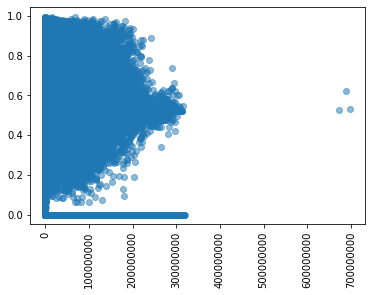

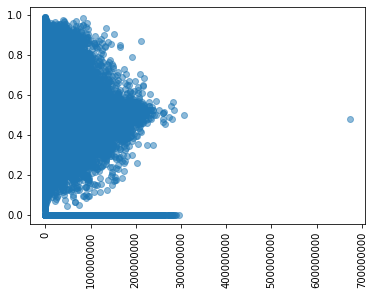

In [21]:
plt.scatter(dataframetrue["DiffTime"], dataframetrue["weighted_vote_score"], alpha=0.5)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.xticks(rotation=90)
plt.title("DiffTime vs Weighted Vote Score, Recommended = True")
plt.show()

plt.scatter(dataframefalse["DiffTime"], dataframefalse["weighted_vote_score"], alpha=0.5)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.xticks(rotation=90)
plt.title("DiffTime vs Weighted Vote Score, Recommended = False")
plt.show()

If we include whether an application is recommended or not in the review there isn't any change as it's possible to see observing the plot and the Spearman's Correlation Coefficients. 

**[RQ8] d.** What are histograms, bar plots, scatterplots and pie charts used for?

**Histograms**, **Bar Plots**, **Scatterplots** and **Pie Charts** are useful plots used in exploratory data analysis in order to understand what are the characteristics of the data. More specifically:
*   **Histogram**: A histogram is a plot used to display frequency distributions when there are numerical data.
*   **Barplot**: A bar plot is a plot that display data using rectangular bars or columns that represent the frequency of observations in the data for that category.
*   **Scatterplot**: A scatter plot  is a type of plot using Cartesian coordinates to display values for two variables for a set of data.
*   **Pie Charts**: A pie chart is a representation of data in the form of a circular chart or pie where the slices of the pie show the percentage of the data in a category.


**[RQ8] e.** What insights can you extract from a Box Plot?

From a **Box Plot** it is possible to extract:
* minimum: the lowest data point excluding any outliers
* maximum: the highest data point excluding any outliers.
* median: the middle value of the dataset.
* first quartile
* third quartile 
* interquartile range: the difference between the third quartile and the first quartile. 
* lower and upper extremes

**<h3> TQ1 <h3>**
* **TQ1. 1** What does the algorithm compute? </p>
It find the maximum. 


<b>What is asymptotically  the running time of the algorithm in the worst case, as a function of n?</b>
<br>The size of the initial array is n.
<br>set L = [all the elements of A with value <= s]
<br>
set R = [all the elements of A with value > s]
<br>To assign the values to the arrays L and R we have to loop, in the worst case, n times the initial array for two times. This give us a big-O complexity of O(2n).

</p>
<b>What is asymptotically the running time of the algorithm in the best case?</b>
<p>
set L = [all the elements of A with value <= s]
<br>
set R = [all the elements of A with value > s]
<br>In the best case scenario the algorithm have to iterate n times only one of the two arrays. So until this point we have a complexity of o(n).<br>
if k == r:<br>
return s
<br>This is the condition that returns the output of the function. In the best case this condition is encountered on the first iteration with a complexity of o(1).
So the complexity in the best scenario is o(n).
</p>

<h3>Second question</h3>
<b>How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)</b><br>
<p>The given array will be break in half in the recursive steps, firstly the first half then the second one. This operation is made until the size of the sub arrays is equal or less to 1, then the swaplist function is called. This last function swaps the elements of the arrays.<br>
By splitting the arrays we create a binary tree of sub arrays, where the root node is the original array. So, because the algorithm in every step splits the array in half, we have a complexity of O( log(n) ) for this operations. At this analysis we have to add two O(n) complexities for the merging operation of the sub arrays and for the swapList function, which iterates over all the subarrays to swap the elements. In conclusion, the complexity overall is O( n^2 * log(n) ).</p>
<br><b>What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.</b><br>
<p>The algorithm sort the original array by using a 'Merge sort' approach. The original array is split in half everytime the recursive steps are reached, so that when the binary tree of the sub arrays is created, the swapList function is called on every node of this tree to swap the elements. At the end of this algorithm, the function will return the original array sorted.</p>

<h3>Third Question</h3>

<p>
In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:
</p>

W_max = Weight Budget<br>

1. Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
	
	=> sort the items by their weight and add them until total_weight < W_max

2. Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.

	=> reverse sort the items by their value and add them until total_weight < W_max

3. Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

	=> reverse sort the items by value/weight and add them until total_weight < W_max



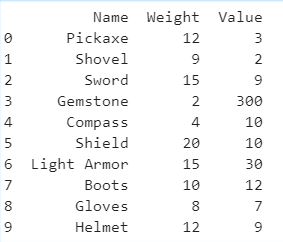

<h4>First Example</h4>
<b>Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded</b>

In [ ]:
data = pd.read_csv('items.CSV', delimiter=';')

total_weight = 0  # weight in the knapsack
w_max = 50  # weight budget
items = {}

for i in data.iterrows():
    items.update({i[1].Name : i[1].Weight})

sorted_items = dict(sorted(items.items(), key=lambda item : item[1]))

item_added = []

for i in sorted_items.keys():
    if(total_weight+sorted_items.get(i) < w_max):
        total_weight += sorted_items.get(i)
        item_added.append(i)

print('Total Weight: {}\nItems added: {}'.format(total_weight, item_added))

The way in which the items are added to the knapsack is not the most efficient one

<h4>Second Example</h4>
<b>Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.</b>
The order of the items should be:
<br>'Gemstone': 300,
<br>'Light Armor': 30, 
<br>'Boots': 12, 
<br>'Compass': 10, 
<br>'Shield': 10, 
<br>'Sword': 9, 
<br>'Helmet': 9, 
<br>'Gloves': 7, 
<br>'Pickaxe': 3, 
<br>'Shovel': 2
<br>
<br>
The sum of the weight of the items until "Shield" is 51. So the items in the knapsack would be:<br>
<br>
1. Gemstone
<br>
2. Light Armor
<br>
3. Boots
<br>
4. Compass

This is not the most efficient way to have the most items in the bag

<h4>Third Example</h4>
<b>Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded</b>
<br><br>
'Gemstone': 150,
<br>
'Light Armor': 2,
<br>'Compass': 2,
<br>'Boots': 1,
<br>'Helmet': 0,
<br>'Gloves': 0,
<br>'Shield': 0,
<br>'Sword': 0,
<br>'Shovel': 0,
<br>'Pickaxe': 0,
<br>
<br>
These are the items ordered in reverse by using the relative value v_i/w_i. If the items are added to the knapsack in this order there will be:

1. Gemstone
2. Light Armor
3. Compass
4. Boots
5. Helmet

Again, by using this algorithm we will not the most number of items in the knapsack